In [1]:
import cPickle as pickle
import numpy as np
f = open('/home/mohammad/img_label.p','rb')
label=pickle.load(f)
f.close()

f = open('/home/mohammad/img_data.p','rb')
data=pickle.load(f)
f.close()

In [2]:
label.shape, data.shape

((22424,), (22424, 50, 50))

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
s = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=0)
for train_index, test_index in s.split(data,label):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test = data[train_index], data[test_index]
    y_train1, y_test = label[train_index], label[test_index]
    
s = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in s.split(X_train1,y_train1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_valid = X_train1[train_index], X_train1[test_index]
    y_train, y_valid = y_train1[train_index], y_train1[test_index]
    
#X_train1, X_test, y_train1, y_test = StratifiedShuffleSplit(data, label,test_size=0.33, random_state=42)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train1, y_train1,test_size=0.2, random_state=42)
print X_train.shape,X_valid.shape, X_test.shape,y_test.shape,y_train.shape

('TRAIN:', array([ 7847,  5892, 14740, ...,  9417, 15291, 21710]), 'TEST:', array([19333,   164, 18740, ..., 19430, 10352,  9113]))
('TRAIN:', array([ 3927,  1771,  6437, ..., 12229, 10047,  1140]), 'TEST:', array([12453, 14500, 14834, ...,  3847,  3098,  8061]))
(12019, 50, 50) (3005, 50, 50) (7400, 50, 50) (7400,) (12019,)


In [28]:
import tensorflow as tf
import sys

In [29]:
sys.path.append('/home/mohammad/anaconda/lib/python2.7/site-packages')
import keras
from keras.utils import np_utils

In [30]:
image_size=50
num_labels=10
def reformat(dataset1):
    dataset1 = dataset1.reshape(dataset1.shape[0], image_size, image_size,1).astype(np.float32)
    #dataset2 = dataset2.reshape(dataset2.shape[0], 1, image_size, image_size)
    #dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    #labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    #labels = labels.reshape((-1,10))
    return dataset1
X_train = reformat(X_train)
X_valid = reformat(X_valid)
X_test = reformat(X_test)
print('Training set', X_train.shape)
print('Validation set', X_valid.shape)
#print('Test set', test_dataset.shape, test_labels.shape)

('Training set', (12019, 50, 50, 1))
('Validation set', (3005, 50, 50, 1))


In [31]:
y_train = np_utils.to_categorical(y_train, num_labels)
y_test = np_utils.to_categorical(y_test, num_labels)
y_valid = np_utils.to_categorical(y_valid, num_labels)
print('Training set', y_train.shape)
print('Validation set',y_valid.shape)

('Training set', (12019, 10))
('Validation set', (3005, 10))


In [32]:
# input image dimensions
img_rows, img_cols = 50,50
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)
nb_classes = 10
input_shape = (img_rows, img_cols,1) ##this is tf backend, for theano (1,50,50)

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
#from keras import backend as K


model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
conv1=model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [74]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_9 (Convolution2D)  (None, 48, 48, 32)    320         convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
activation_17 (Activation)       (None, 48, 48, 32)    0           convolution2d_9[0][0]            
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 46, 46, 32)    9248        activation_17[0][0]              
____________________________________________________________________________________________________
activation_18 (Activation)       (None, 46, 46, 32)    0           convolution2d_10[0][0]           
___________________________________________________________________________________________

In [75]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), nb_epoch=20, batch_size=32,verbose=1)

Train on 12019 samples, validate on 3005 samples
Epoch 1/20
12019/12019 [==============================] - 80s - loss: 2.2557 - acc: 0.1730 - val_loss: 2.1428 - val_acc: 0.1977
Epoch 2/20
12019/12019 [==============================] - 82s - loss: 1.8231 - acc: 0.3575 - val_loss: 1.5021 - val_acc: 0.5022
Epoch 3/20
12019/12019 [==============================] - 80s - loss: 1.3910 - acc: 0.5163 - val_loss: 1.2380 - val_acc: 0.5062
Epoch 4/20
12019/12019 [==============================] - 79s - loss: 1.0302 - acc: 0.6504 - val_loss: 1.1005 - val_acc: 0.5817
Epoch 5/20
12019/12019 [==============================] - 79s - loss: 0.7166 - acc: 0.7698 - val_loss: 0.8540 - val_acc: 0.7850
Epoch 6/20
12019/12019 [==============================] - 81s - loss: 0.4550 - acc: 0.8606 - val_loss: 0.4775 - val_acc: 0.8499
Epoch 7/20
12019/12019 [==============================] - 85s - loss: 0.3028 - acc: 0.9111 - val_loss: 0.3017 - val_acc: 0.9085
Epoch 8/20
12019/12019 [==============================]

In [76]:
from sklearn.metrics import log_loss
predictions_valid = model.predict(X_valid, batch_size=128, verbose=1)
score = log_loss(y_valid, predictions_valid)
print('Score log_loss: ', score)

3005/3005 [==============================] - 6s     
('Score log_loss: ', 0.056626693731565203)


In [77]:
classes = model.predict_classes(X_test, batch_size=32)
proba = model.predict_proba(X_test, batch_size=32)
predictions_test = model.predict(X_test, batch_size=128, verbose=1)
score = log_loss(y_test, predictions_test)
print('Score log_loss: ', score)

7400/7400 [==============================] - 14s    
('Score log_loss: ', 0.069261279930452613)


In [78]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.069060982824680775)
('Test accuracy:', 0.98243243243243239)


In [79]:
y_test[1]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

['acc', 'loss', 'val_acc', 'val_loss']


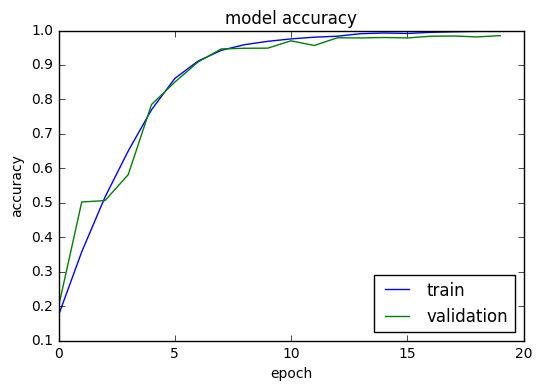

In [88]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
#
plt.show()
#plt.savefig('/home/mohammad/model_accuracy.png',dpi=300)


In [90]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
#plt.show()
plt.savefig('/home/mohammad/model_loss.png',dpi=300)

In [17]:
np.round(predictions_test[0],1)

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.], dtype=float32)

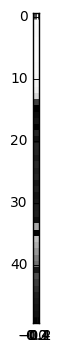

In [63]:
import matplotlib.cm as cm
i = 1600
a = X_test[i]
a = a.reshape(1,50,50)
plt.imshow(X_test[i, 0], interpolation='nearest',cmap= cm.binary)
plt.show()
#a.shape

In [108]:
from sklearn.metrics import classification_report
y_pred = np.argmax(predictions_test, axis=1)
y_test1 = np.argmax(y_test,axis=1)
print(classification_report(y_test1, y_pred))



             precision    recall  f1-score   support

          0       0.99      0.98      0.98       821
          1       0.98      1.00      0.99       748
          2       0.99      0.98      0.98       765
          3       0.99      0.99      0.99       774
          4       0.98      0.98      0.98       768
          5       0.99      0.99      0.99       763
          6       0.97      0.99      0.98       767
          7       0.98      0.99      0.98       661
          8       0.98      0.94      0.96       631
          9       0.97      0.98      0.97       702

avg / total       0.98      0.98      0.98      7400



[[803   3   2   2   2   0   3   3   0   3]
 [  0 745   0   1   0   0   0   0   1   1]
 [  1   2 751   1   1   1   3   4   1   0]
 [  0   0   0 770   4   0   0   0   0   0]
 [  4   1   0   0 756   0   4   0   1   2]
 [  2   0   0   1   0 756   2   0   0   2]
 [  1   1   3   1   2   0 758   0   1   0]
 [  0   1   0   1   1   0   0 654   2   2]
 [  1   3   4   2   2   1  10   5 591  12]
 [  2   1   0   0   2   2   0   4   5 686]]


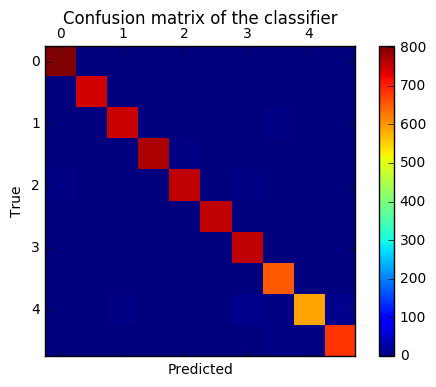

In [120]:
from sklearn.metrics import confusion_matrix
a = range(10)
cm = confusion_matrix(y_test1, y_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + a)
ax.set_yticklabels([''] + a)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [84]:
from keras import backend as K
inputs = [K.learning_phase()] + model.inputs

_convout1_f = K.function(inputs, [conv1.output])
def convout1_f(X):
    # The [0] is to disable the training phase flag
    return _convout1_f([0] + [X])



AttributeError: 'NoneType' object has no attribute 'output'

In [82]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic


In [ ]:
# Visualize weights
W = model.layers[0].W.get_value(borrow=True)
W = np.squeeze(W)
print("W shape : ", W.shape)

plt.figure(figsize=(15, 15))
plt.title('conv1 weights')
plt.imshow(pl.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)



In [ ]:
http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [142]:
import os, glob, math, cv2, time
import numpy as np
from skimage import io
from joblib import Parallel, delayed
import cPickle as pickle
from skimage.transform import resize

def resize_image(img_file):
    img = cv2.imread(img_file,0)
    img = cv2.resize(img, sz).astype('float32') / 255.0
    return img
img_size = 50
sz = (img_size, img_size)

ss =[]
ss1=[]
path = os.path.join('/home/mohammad/test_img_state','*.jpg')
files = glob.glob(path)
print(files)
ss.extend(Parallel(n_jobs=3)(delayed(resize_image)(im_file) for im_file in files))
#ss1.extend(len(files))

['/home/mohammad/test_img_state/img_7847.jpg', '/home/mohammad/test_img_state/img_3084.jpg', '/home/mohammad/test_img_state/img_4407.jpg', '/home/mohammad/test_img_state/img_775.jpg', '/home/mohammad/test_img_state/img_10147.jpg', '/home/mohammad/test_img_state/img_6050.jpg', '/home/mohammad/test_img_state/img_5668.jpg', '/home/mohammad/test_img_state/img_1790.jpg', '/home/mohammad/test_img_state/img_3352.jpg', '/home/mohammad/test_img_state/img_1532.jpg']


In [132]:
ss= np.array(ss)
ss.shape

(10, 50, 50)

In [134]:
ss= reformat(ss)
ss.shape

(10, 50, 50, 1)

In [138]:
classes1 = model.predict_classes(ss, batch_size=32)
proba1 = model.predict_proba(ss, batch_size=32)
predictions_test1 = model.predict(ss, batch_size=128, verbose=1)


10/10 [==============================] - 0s


In [141]:
predictions_test1 = np.argmax(predictions_test1, axis=1)
predictions_test1

array([5, 9, 3, 4, 9, 0, 1, 6, 2, 7])